# Airlines_Reviews_Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r'C:\Users\HP\Desktop\Certificate\jupiter\data.csv\singapore_airlines_reviews.csv'
path = path.replace('\\','/')

## Exploratory Data Analysis...

In [3]:
df = pd.read_csv(path)
df

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


### Statistical analysis and Preprocessing...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               10000 non-null  object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [5]:
df.describe()

,rating,helpful_votes
count,10000.000000,10000.000000
mean,4.015800,1.275200
std,1.346006,2.721618
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,2.000000
max,5.000000,158.000000


In [6]:
df.isna().sum()

published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 0
helpful_votes         0
dtype: int64

In [7]:
df.rating.value_counts()

5    5424
4    1967
1    1057
3    1009
2     543
Name: rating, dtype: int64

* data is imbalanced 5.4k reviews for 5 star and 2k for 4 star.

In [8]:
df.published_platform.value_counts()

Desktop    7352
Mobile     2648
Name: published_platform, dtype: int64

In [9]:
df['date'] = df.published_date.apply(lambda x: x.split('T')[0])

In [10]:
df.head(2)

,published_date,published_platform,rating,type,text,title,helpful_votes,date
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024-03-12
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024-03-11


In [11]:
df['date'] = pd.to_datetime(df.date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   published_date      10000 non-null  object        
 1   published_platform  10000 non-null  object        
 2   rating              10000 non-null  int64         
 3   type                10000 non-null  object        
 4   text                10000 non-null  object        
 5   title               10000 non-null  object        
 6   helpful_votes       10000 non-null  int64         
 7   date                10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 625.1+ KB


In [13]:
df.rename(columns={'type':'type_'},inplace=True)

In [14]:
df.drop(['published_date','type_','helpful_votes'],axis=1,inplace=True)
df.head(2)

,published_platform,rating,text,title,date
0,Desktop,3,We used this airline to go from Singapore to L...,Ok,2024-03-12
1,Desktop,5,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,2024-03-11


In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head(4)

,published_platform,rating,text,title,date,year,month,day
0,Desktop,3,We used this airline to go from Singapore to L...,Ok,2024-03-12,2024,3,12
1,Desktop,5,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,2024-03-11,2024,3,11
2,Desktop,1,"Booked, paid and received email confirmation f...",Don’t give them your money,2024-03-11,2024,3,11
3,Desktop,5,"Best airline in the world, seats, food, servic...",Best Airline in the World,2024-03-11,2024,3,11


### Graphs...

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px

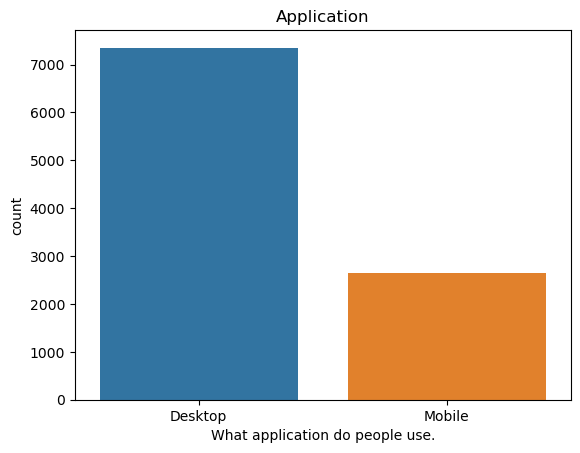

In [17]:
plt.title('Application')
sns.countplot(data=df ,x = 'published_platform')
plt.xlabel('What application do people use.');

* majority of the people uses Destops for reveiws.

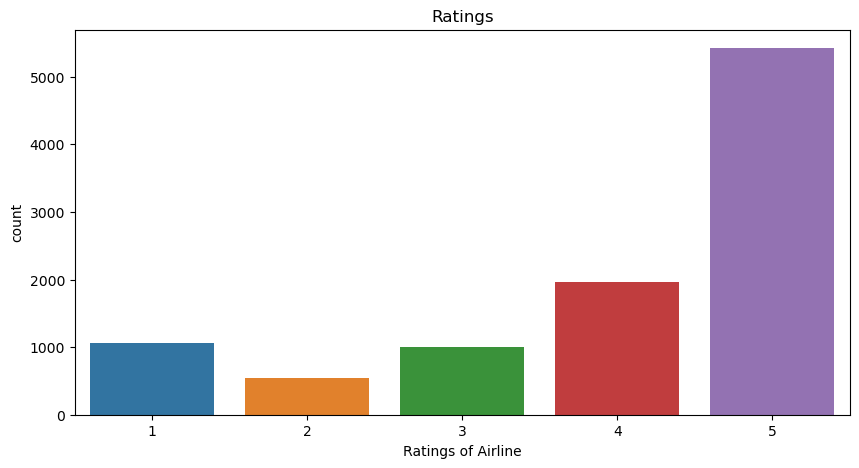

In [18]:
plt.figure(figsize=(10,5))
plt.title('Ratings')
sns.countplot(data=df,x='rating')
plt.xlabel('Ratings of Airline');

In [19]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head(4)

,published_platform,rating,text,title,date,year,month,day
0,Desktop,3,We used this airline to go from Singapore to L...,Ok,2024-03-12,2024,3,12
1,Desktop,5,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,2024-03-11,2024,3,11
2,Desktop,1,"Booked, paid and received email confirmation f...",Don’t give them your money,2024-03-11,2024,3,11
3,Desktop,5,"Best airline in the world, seats, food, servic...",Best Airline in the World,2024-03-11,2024,3,11


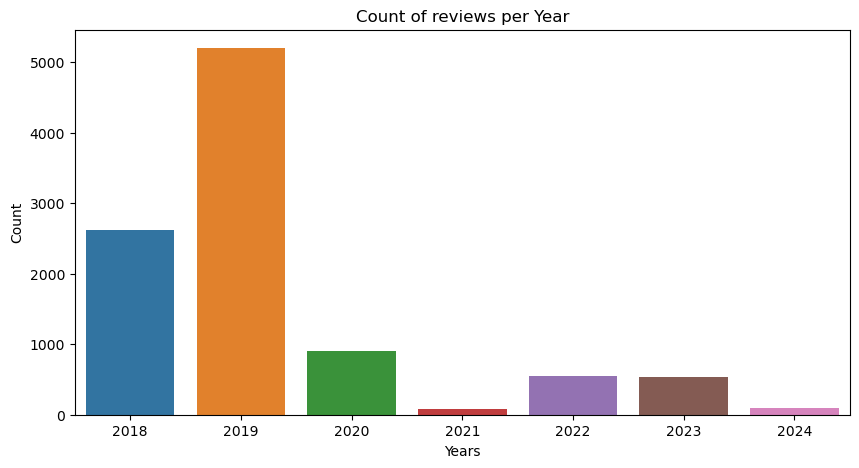

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x='year')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Count of reviews per Year');

* Looks like there is no reviews due to Covid-pandamic.  

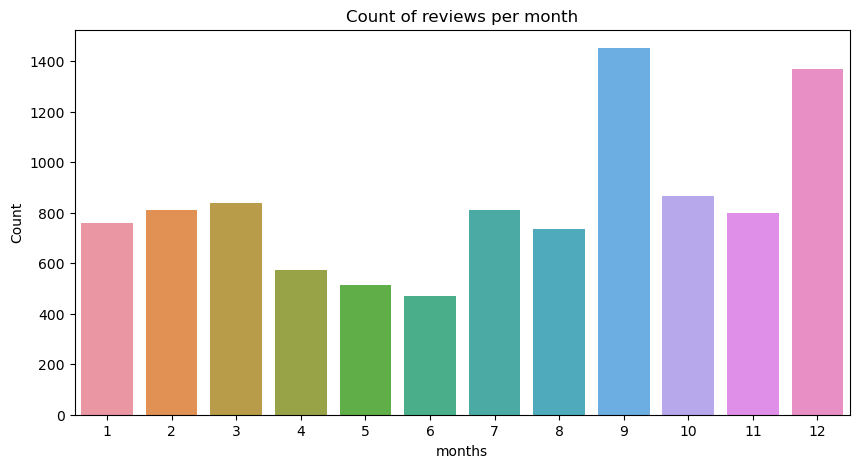

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x='month')
plt.xlabel('months')
plt.ylabel('Count')
plt.title('Count of reviews per month');

## Natural Language Processing...

### Preprocessing the data...

In [22]:
df.head(5)

,published_platform,rating,text,title,date,year,month,day
0,Desktop,3,We used this airline to go from Singapore to L...,Ok,2024-03-12,2024,3,12
1,Desktop,5,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,2024-03-11,2024,3,11
2,Desktop,1,"Booked, paid and received email confirmation f...",Don’t give them your money,2024-03-11,2024,3,11
3,Desktop,5,"Best airline in the world, seats, food, servic...",Best Airline in the World,2024-03-11,2024,3,11
4,Desktop,2,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,2024-03-10,2024,3,10


In [23]:
df1 = df.drop(['published_platform','date','year','month','day'],axis=1)
df1.head(5)

,rating,text,title
0,3,We used this airline to go from Singapore to L...,Ok
1,5,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...
2,1,"Booked, paid and received email confirmation f...",Don’t give them your money
3,5,"Best airline in the world, seats, food, servic...",Best Airline in the World
4,2,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...


In [24]:
df1['title_text'] = df1['title'] + ' ' + df1['text']
df1.drop(['text','title'],axis=1,inplace=True)
df1.head(3)

,rating,title_text
0,3,Ok We used this airline to go from Singapore t...
1,5,The service in Suites Class makes one feel lik...
2,1,"Don’t give them your money Booked, paid and re..."


** So, we will try to balance our data using undersampling and Oversampling(blind copy) 

In [29]:
df1.rating.value_counts()

5    5424
4    1967
1    1057
3    1009
2     543
Name: rating, dtype: int64

In [32]:
df_rating1 = df1[df1['rating'] == 1]
df_rating2 = df1[df1['rating'] == 2]
df_rating3 = df1[df1['rating'] == 3]
df_rating4 = df1[df1['rating'] == 4]
df_rating5 = df1[df1['rating'] == 5]

In [34]:
min_size = 2000
final5 = df_rating5.sample(min_size)
final4 = df_rating4.sample(min_size,replace=True)
final3 = df_rating3.sample(min_size,replace=True)
final2 = df_rating2.sample(min_size,replace=True)
final1 = df_rating1.sample(min_size,replace=True)

In [36]:
final5.shape,final4.shape,final3.shape,final2.shape,final1.shape

((2000, 2), (2000, 2), (2000, 2), (2000, 2), (2000, 2))

In [38]:
finaldf = pd.concat([final5,final4,final3,final2,final1],axis=0)
finaldf

,rating,title_text
9200,5,Singapore Airline excellent service The flight...
6586,5,Great service and comfort We prefer Singapore ...
9574,5,"Legroom Need I say more, as a tall person my l..."
4089,5,Great service Wonderful service from all the ...
4645,5,Professional and wonderful service Service cre...
...,...,...
3040,1,Bumped off Premium Economy flight - No respons...
1443,1,Return flight to United kingdom My husband and...
3349,1,""" SINGAPOOR"" Dont Fly Singapore if you are Coe..."
7353,1,First class lounge in Melbourne is 0/10 Very d...


In [39]:
df1 = finaldf

In [40]:
import re

In [41]:
'''def reg_ex(text):
    return re.sub('\\n','',text)
'''
# It seems that reg_space can remove \n too

def reg_space(text):
    return re.sub('\s+'," ",text)

In [42]:
df1["filter_title_text"] = df1.title_text.apply(reg_space)
df1.head(4)

,rating,title_text,filter_title_text
9200,5,Singapore Airline excellent service The flight...,Singapore Airline excellent service The flight...
6586,5,Great service and comfort We prefer Singapore ...,Great service and comfort We prefer Singapore ...
9574,5,"Legroom Need I say more, as a tall person my l...","Legroom Need I say more, as a tall person my l..."
4089,5,Great service Wonderful service from all the ...,Great service Wonderful service from all the s...


In [43]:
import spacy
nlp = spacy.load('en_core_web_lg')
from spacy.lang.en import STOP_WORDS as stop

def preprocess(text):
    
    doc = nlp(text)
    filter_data = []
    
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        else:
            filter_data.append(token.lemma_.lower())

    return " ".join(filter_data)

In [44]:
%%time
df1["filter_title_text"] = df1.filter_title_text.apply(preprocess)
df1.head(3)

Wall time: 5min 16s


,rating,title_text,filter_title_text
9200,5,Singapore Airline excellent service The flight...,singapore airline excellent service flight goo...
6586,5,Great service and comfort We prefer Singapore ...,great service comfort prefer singapore airline...
9574,5,"Legroom Need I say more, as a tall person my l...",legroom need tall person leg comfortable fligh...


In [50]:
df1['filter_title_text'][0]

0    ok airline singapore london heathrow issue tic...
0    ok airline singapore london heathrow issue tic...
0    ok airline singapore london heathrow issue tic...
0    ok airline singapore london heathrow issue tic...
Name: filter_title_text, dtype: object

### Convert to vector...

'''I have imported Spacy's pre-trained model.So, I can do word embedding by using spacy.'''

In [51]:
%%time
df1['text_vector'] = df1.filter_title_text.apply(lambda x: nlp(x).vector)
df1.head(4)

Wall time: 3min 2s


,rating,title_text,filter_title_text,text_vector
9200,5,Singapore Airline excellent service The flight...,singapore airline excellent service flight goo...,"[-0.22511181, 0.36719263, -2.460213, 0.4286976..."
6586,5,Great service and comfort We prefer Singapore ...,great service comfort prefer singapore airline...,"[-0.60573274, 1.2936379, -3.0409553, 1.0689138..."
9574,5,"Legroom Need I say more, as a tall person my l...",legroom need tall person leg comfortable fligh...,"[0.56060356, 0.26697513, -2.3558538, -0.531086..."
4089,5,Great service Wonderful service from all the ...,great service wonderful service staff comforta...,"[-0.92312884, 0.105509, -1.1276429, -0.0346874..."


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1.text_vector, df1.rating, test_size=0.2 , stratify=df1.rating)

In [53]:
x_train.shape,x_test.shape

((8000,), (2000,))

In [54]:
x_train_2d = np.stack(x_train.values)
x_test_2d = np.stack(x_test.values)

In [55]:
x_train_2d.shape
x_train_2d

array([[-0.16113406,  0.3729167 , -2.1336262 , ..., -0.5672298 ,
        -2.3068023 ,  1.474121  ],
       [ 0.18759158,  0.8828261 , -2.8392808 , ..., -1.4948877 ,
        -1.3927152 ,  1.139407  ],
       [-0.8216163 ,  1.4361962 , -2.2600894 , ..., -0.07725808,
        -1.211045  ,  0.4400557 ],
       ...,
       [ 0.54107237, -0.16024168, -2.219827  , ..., -0.0482158 ,
        -1.8551617 ,  1.817386  ],
       [ 0.9884011 ,  1.2029536 , -2.9131904 , ..., -0.14237355,
        -2.3554218 ,  1.4622645 ],
       [-0.37921813,  0.97062737, -3.7399979 , ..., -0.08168927,
        -2.0357    ,  1.5168363 ]], dtype=float32)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_2d)
x_test_scaled = scaler.fit_transform(x_test_2d)

## Machine Learning...

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30,algorithm ='auto')

In [58]:
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=30)

In [59]:
pre = model.predict(x_test_scaled)
model.score(x_test_scaled,y_test)

0.4965

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           1       0.60      0.68      0.64       400
           2       0.40      0.54      0.46       400
           3       0.42      0.42      0.42       400
           4       0.48      0.32      0.38       400
           5       0.60      0.53      0.56       400

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pre)

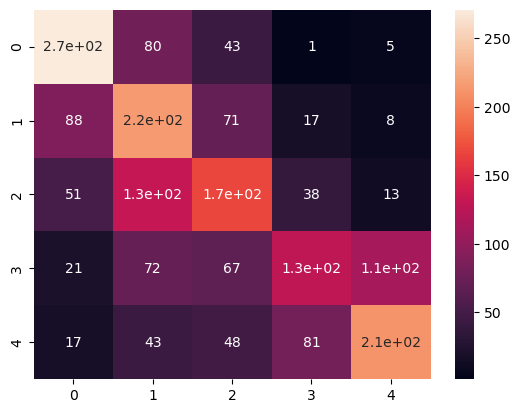

In [62]:
sns.heatmap(cm,annot=True);

In [66]:
import joblib

In [67]:
joblib.dump(model,'airlines_reviwes_model.joblib')

['airlines_reviwes_model.joblib']

In [68]:
df1.to_csv('airlines_reviews_text.csv', index=False)

# ...Thank You...